<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Machine Learning - FIFA 2018 Statistics

## Table Of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Preprocessing Of Data](#section3)<br>
4. [Decision Tree](#section4)<br>
    - 4.1 [Prepare X and Y using pandas](#section401)<br>
    - 4.2[ Splitting X and Y into training and testing data set](#section402)<br>
    - 4.3[ Decision Tree in scikit-learn](#section403)<br>    
    - 4.4[ Using model for prediction](#section404)<br>    
5. [Model Evaluation](#section5)<br>    
    - 5.1 [Model evaluation using accuracy score](#section501)<br>
    - 5.2 [Model evaluation using confusion matrix](#section502)<br>   
6. [Grid Search](#section6)<br>   
7. [Feature Section](#section7)<br>   
    - 7.1 [VIF Calculation](#section701)<br>
    - 7.2 [Vary Independent Variable and Test-Train%](#section702)<br>
    - 7.3 [Grid Search](#section703)<br>
8. [Random Forest](#section8)<br> 
    - 8.1 [ Prepare X and Y using pandas](#section801)<br>
    - 8.2 [ Splitting X and Y into training and testing data set](#section802)<br>
    - 8.3 [ Decision Tree in scikit-learn](#section803)<br>    
    - 8.4 [ Using model for prediction](#section804)<br>    
    - 8.5 [ Model evaluation using accuracy](#section805)<br>
    - 8.6 [ Model evaluation using confusion matrix](#section806)<br>
    - 8.7 [ Model evaluation using precision score](#section807)<br>
    - 8.8 [ Model evaluation using recall score](#section808)<br>
    - 8.9 [ Model evaluation using F1 score](#section809)<br>
    - 8.10 [ Model evaluation using ROC_AUC curve](#section810)<br>
9. [Conclusion](#section9)<br>   

<a id='section1'></a>

### Problem Statement

Understand FIFA 2018 statistcis and appy machine learning techniqes to predict goals scored.

<a id='section2'></a>

### Data Loading and Description

These are statistics for the 2018 FIFA World Cup, which took place in Russia from 14 June to 15 July 2018. The World Cup starts with 8 groups, there are 4 national teams in each group, it is a round-robin tournament in group stage and the top two teams qualify. It then goes to an elimination tournament among the 16 qualified teams.

#### Import packages

In [275]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Import data set

In [276]:
fifa_data = pd.read_csv("FIFA 2018 Statistcis.csv")

In [277]:
fifa_data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [278]:
fifa_data.shape

(128, 27)

In [279]:
fifa_data.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

- Fifa data set consist of 128 statistics and 27 data points.
- Statistics cover team, opponent, goal scored, ball possession, card, penalty shot out and other stats. Below are details.


| Column Name                      | Description                                                      |
| -------------                    |:-------------                                                   :|
| Date                             | Match Date                                                       |
| Team                             | Playing Team                                                     |
| Opponent                         | Opponent Team                                                    |
| Goal Scored                      | Number of goals scored by this team                              |
| Ball Possession                  | %Amount of time ball was in control by the team                  |
| Attempts                         | Number of attempts to score goal                                 |
| On                               | TargetNumber of shots on - target                                |
| Off                              | TargetNumber of shots that went off - target                     |
| Blocked                          | Number of opponent team's attempts blocked by the team           |
| Corners                          | Number of corner shots used                                      |
| Offsides                         | Number of off - side events                                      |
| Free Kicks                       | Number of free - kicks used                                      |
| SavesNumber                      | saves by the goal keeper                                         |
| Pass Accuracy                    | %Percentage of passes that reached the same team player as aimed |
| Passes                           | Total number of passes by the team                               |
| Distance Covered (Kms)           | Total distance covered by the team members in this game          |
| Fouls Committed                  | Number of fouls committed by the team members                    |
| Yellow Card                      | Number of Yellow warning received                                |
| Yellow & Red                     | Number of Yellow & Red warning received                          |
| Red                              | Number of Red cards received                                     |
| Man of the Match                 | Did this team member win Man of the Match?                       |
| 1st Goal                         | When did the team score the 1st goal?                            |
| Round                            | Stage of the match                                               |
| PSO                              | Was there a penalty shootout (PSO) in this match?                |
| Goals in PSO                     | Number of goals scored in the Penalty shootout                   |
| Own goals                        | Number of own goals                                              |
| Own goal Time                    | When did the team score own goal?                                |

<a id='section3'></a>

### Preprocessing Of Data

In [280]:
fifa_data.describe(include='all')

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
count,128,128,128,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128,94.000000,128,128,128.000000,12.0,12.000000
unique,25,32,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,6,2,NaN,NaN,NaN
top,17-06-2018,England,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,NaN,Group Stage,No,NaN,NaN,NaN
freq,8,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,64,NaN,96,120,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,...,1.695312,0.015625,0.015625,NaN,39.457447,NaN,NaN,0.203125,1.0,45.833333
std,NaN,NaN,NaN,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,...,1.325454,0.124507,0.124507,NaN,24.496506,NaN,NaN,0.807049,0.0,29.978275
min,NaN,NaN,NaN,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,0.000000,1.0,12.000000
25%,NaN,NaN,NaN,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,...,1.000000,0.000000,0.000000,NaN,18.250000,NaN,NaN,0.000000,1.0,21.750000
50%,NaN,NaN,NaN,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,...,2.000000,0.000000,0.000000,NaN,39.000000,NaN,NaN,0.000000,1.0,35.000000
75%,NaN,NaN,NaN,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,...,2.000000,0.000000,0.000000,NaN,54.750000,NaN,NaN,0.000000,1.0,75.750000


In [281]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

- 1st goal, own goals and own goal time have null values. Lets analyze futher.

In [282]:
fifa_data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

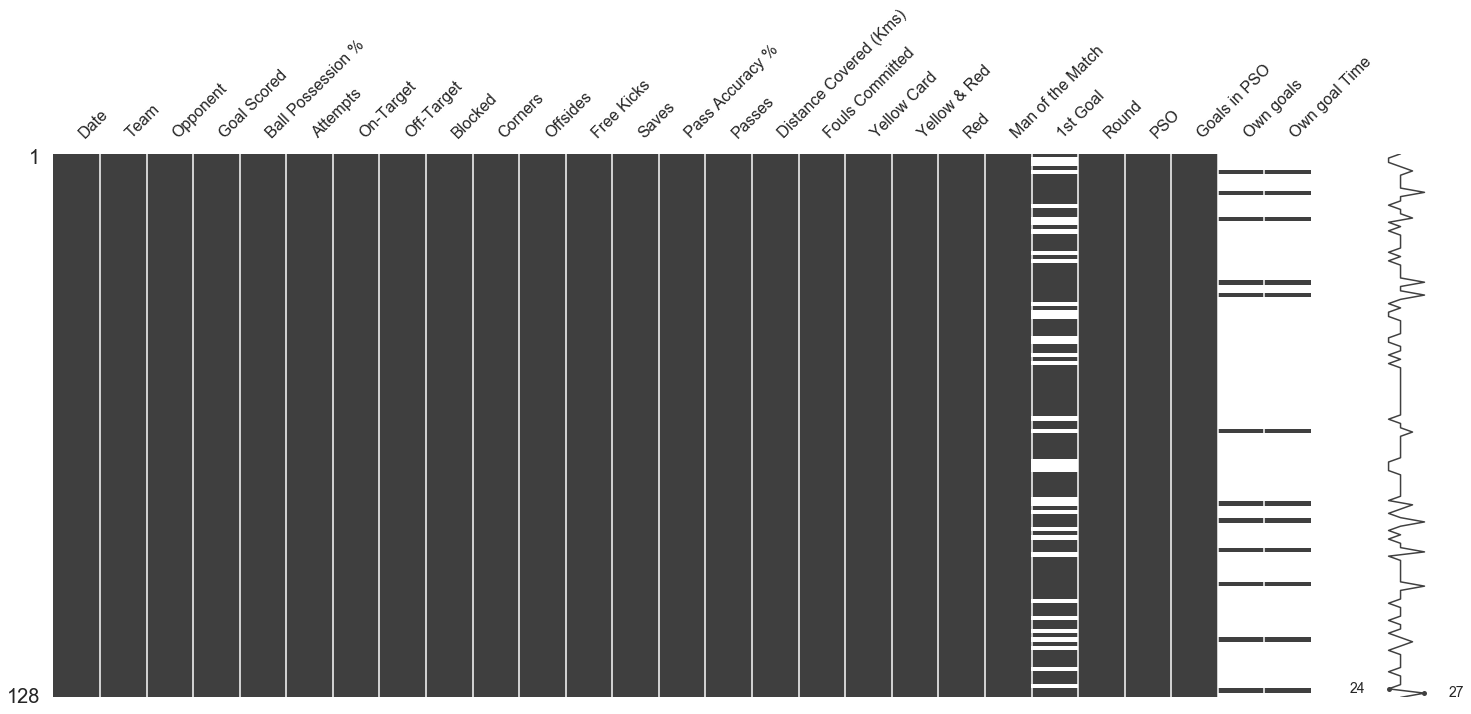

In [283]:
import missingno as msno
msno.matrix(fifa_data)

- Set "Own goals" to ZERO if empty.

In [284]:
fifa_data['Own goals']=fifa_data['Own goals'].fillna(0)

In [285]:
fifa_data[fifa_data['Own goals'].isnull()]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time


In [286]:
fifa_data['1st Goal']=fifa_data['1st Goal'].fillna(-1)

In [287]:
fifa_data[fifa_data['1st Goal'].isnull()]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time


In [288]:
fifa_data['Own goal Time']=fifa_data['Own goal Time'].fillna(-1)

In [289]:
fifa_data[fifa_data['Own goal Time'].isnull()]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time


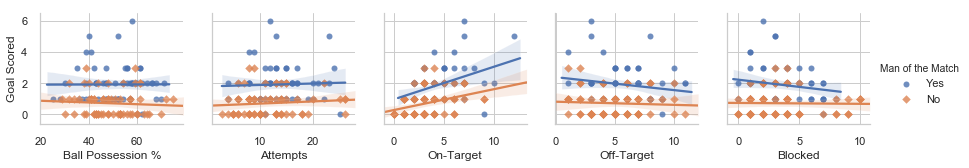

In [290]:
sns.pairplot(fifa_data[['Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked','Man of the Match']],y_vars=['Goal Scored'],x_vars=['Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked'],hue='Man of the Match',markers=['o', 'D'], kind='reg')

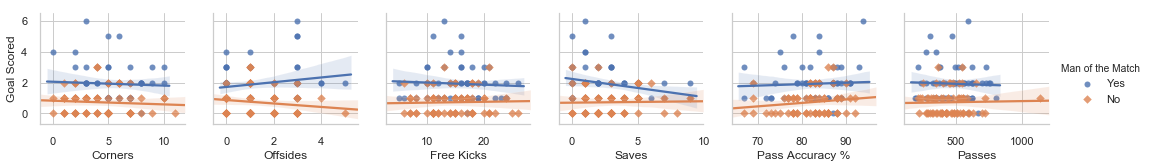

In [291]:
sns.pairplot(fifa_data[['Goal Scored','Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes','Man of the Match']],y_vars=['Goal Scored'],x_vars=['Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes'],hue='Man of the Match',markers=['o', 'D'], kind='reg')

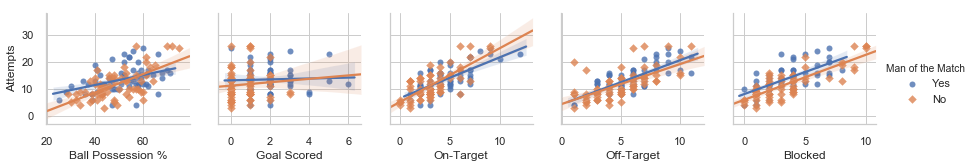

In [292]:
sns.pairplot(fifa_data[['Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked','Man of the Match']],y_vars=['Attempts'],x_vars=['Ball Possession %',
       'Goal Scored', 'On-Target', 'Off-Target', 'Blocked'],hue='Man of the Match',markers=['o', 'D'], kind='reg')

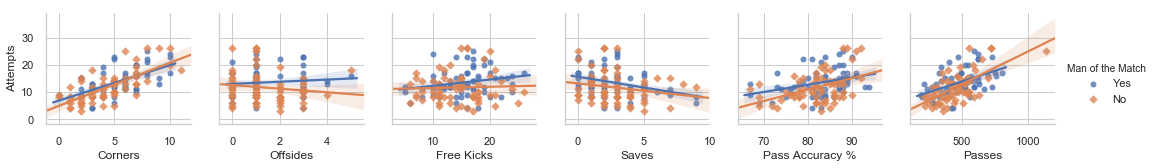

In [293]:
sns.pairplot(fifa_data[['Attempts','Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes','Man of the Match']],y_vars=['Attempts'],x_vars=['Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes'],hue='Man of the Match',markers=['o', 'D'], kind='reg')

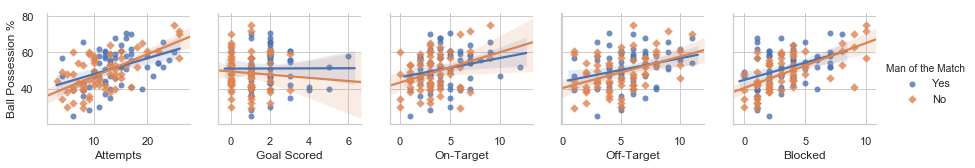

In [294]:
sns.pairplot(fifa_data[['Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked','Man of the Match']],y_vars=['Ball Possession %'],x_vars=['Attempts',
       'Goal Scored', 'On-Target', 'Off-Target', 'Blocked'],hue='Man of the Match',markers=['o', 'D'], kind='reg')

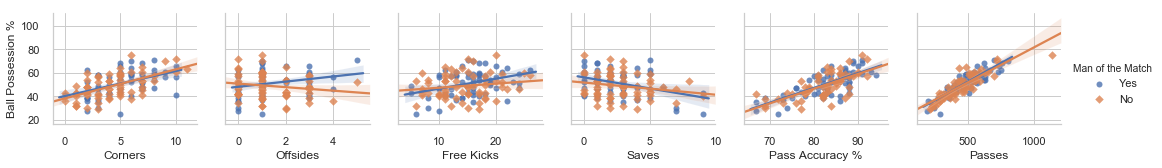

In [295]:
sns.pairplot(fifa_data[['Ball Possession %','Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes','Man of the Match']],y_vars=['Ball Possession %'],x_vars=['Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes'],hue='Man of the Match',markers=['o', 'D'], kind='reg')

- As evident from above plots Attempts and ball procession% has linear relationship with other idependent variables (attempts, on-target, off-target, blocked, corners, saves, pass accuracy % and passes).

Establish correlation between all __features__ using __heatmap__.

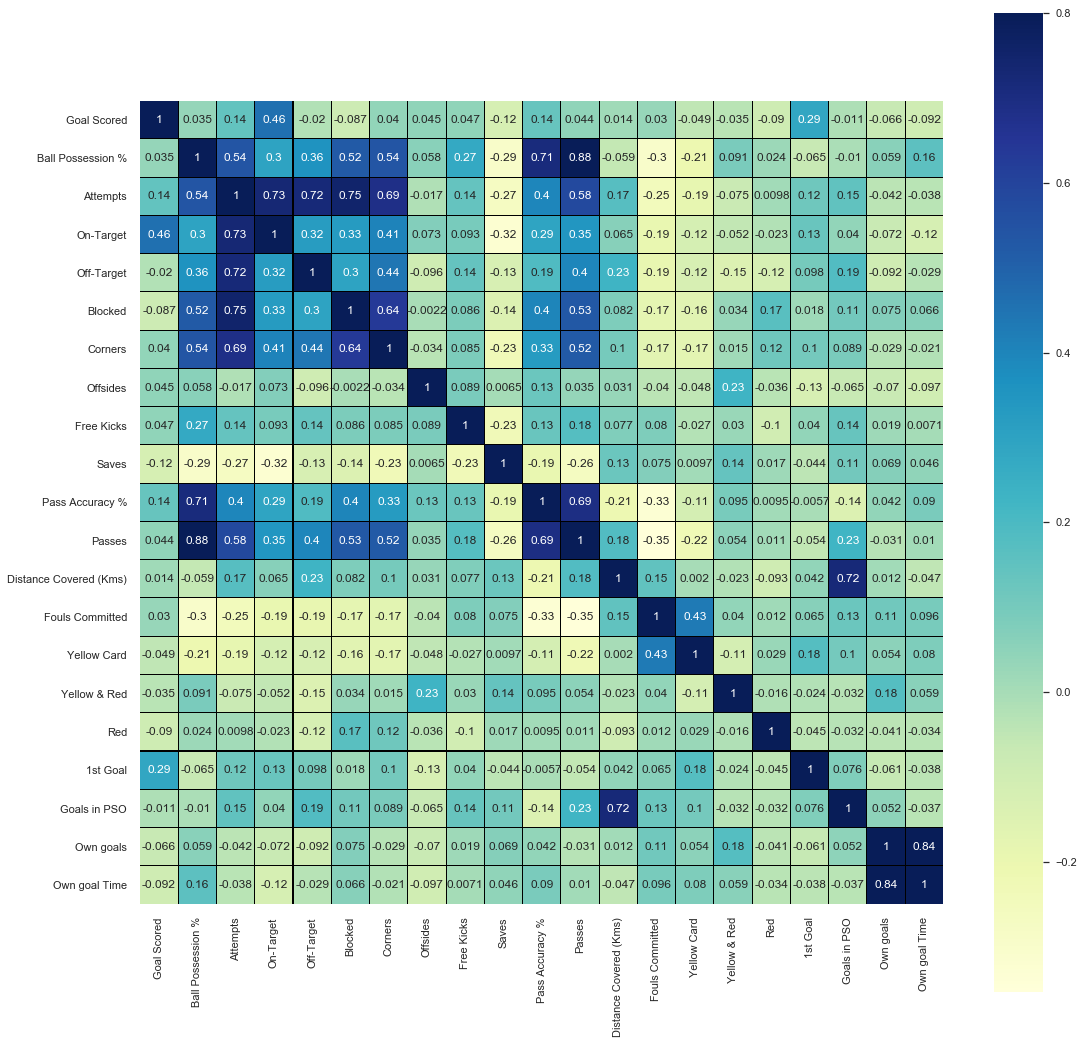

In [296]:
fifa_corr = fifa_data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(fifa_corr, annot=True, vmax=0.8, linewidth=0.01,linecolor='black',square=True, cmap='YlGnBu') 

- Ball possession % has high positive corelation with Pass Accuracy %,Passes, Blocked and Corners.
- Attempts has high positive corelation with Passes, Ball Possession%, On-Target, Off-Target, Blocked and Coreners.

- Ball possession % has high negative corelation with Fouls Committed and Yellow Card.
- Attempt, Pass Accuracy % and Passes has high negative corelation with Fouls Committed.

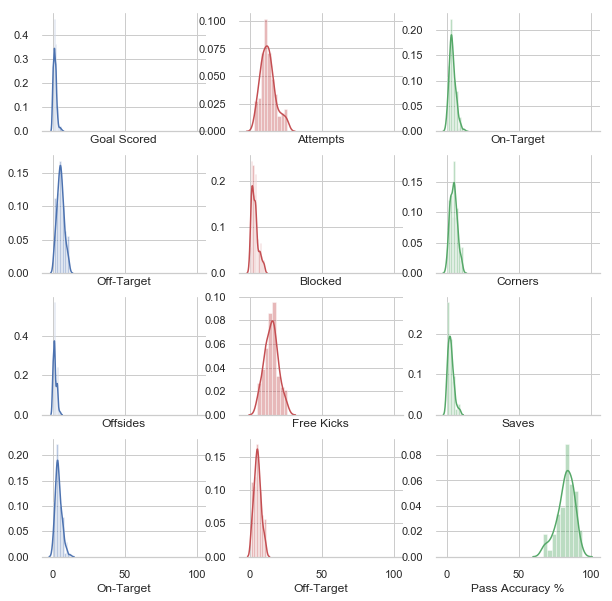

In [297]:
f, axes = plt.subplots(4,3,figsize=(10,10),sharex=True)
sns.despine(left=True)

sns.distplot(fifa_data['Goal Scored'],ax=axes[0,0], color='b')
sns.distplot(fifa_data['Attempts'],ax=axes[0,1], color='r')
sns.distplot(fifa_data['On-Target'],ax=axes[0,2], color='g')
sns.distplot(fifa_data['Off-Target'],ax=axes[1,0], color='b')
sns.distplot(fifa_data['Blocked'],ax=axes[1,1], color='r')
sns.distplot(fifa_data['Corners'],ax=axes[1,2], color='g')
sns.distplot(fifa_data['Offsides'],ax=axes[2,0], color='b')
sns.distplot(fifa_data['Free Kicks'],ax=axes[2,1], color='r')
sns.distplot(fifa_data['Saves'],ax=axes[2,2], color='g')
sns.distplot(fifa_data['On-Target'],ax=axes[3,0], color='b')
sns.distplot(fifa_data['Off-Target'],ax=axes[3,1], color='r')
sns.distplot(fifa_data['Pass Accuracy %'],ax=axes[3,2], color='g')


- Most of independent varialble are normally distributed.

#### Dummification of Team, Opponent, Round and PSO columns

In [298]:
fifa_dummified_data= pd.get_dummies(fifa_data, columns=['Team','Opponent','Round','PSO'],drop_first=True)

<a id="section4"></a>

### Decision Tree

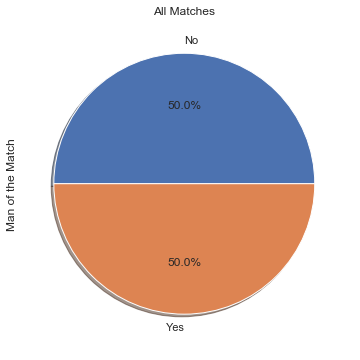

In [299]:
fifa_data['Man of the Match'].value_counts().plot.pie(autopct='%1.1f%%',y='Man of the Match',shadow=True,figsize=(6,6), title='All Matches')

#### Dependent variable is evenly distributed, accuracy is good measure of model.

<a id="section401"></a>

### Prepare X and Y using pandas

In [300]:
x = fifa_dummified_data.loc[:,~fifa_dummified_data.columns.isin(['Date','Man of the Match'])]
x.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes
0,5,40,13,7,3,3,6,3,11,0,...,0,0,0,0,0,1,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,0,1,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,0,0,0,1,0,1,0,0,0,0
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,0,0,1,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,0,1,0,0,0,0


In [301]:
y = fifa_dummified_data['Man of the Match']
y.head()

0    Yes
1     No
2     No
3    Yes
4     No
Name: Man of the Match, dtype: object

<a id='section402'></a>

### Splitting X and Y into training and testing data set

In [302]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=1)

In [303]:
print(x_train.shape)
print(y_train.shape)

(102, 89)
(102,)


In [304]:
print(x_test.shape)
print(y_test.shape)

(26, 89)
(26,)


<a id='section403'></a>

### Decision Tree in scikit-learn

In [305]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

<a id='section404'></a>

### Using model for prediction

In [306]:
y_pred_test = decisiontree.predict(x_test)
y_pred_train = decisiontree.predict(x_train)

We need evaluation metric to compare predicted and actual values.

<a id='section5'></a>

### Model Evaluation

<a id='section501'></a>

#### Model evaluation using accuracy score

In [307]:
from sklearn.metrics import accuracy_score
print('Model accuracy score is ',accuracy_score(y_test,y_pred_test))

Model accuracy score is  0.6538461538461539


<a id='section502'></a>

#### Model evaluation using confusion matrix

In [308]:
from sklearn.metrics import confusion_matrix
conf_matrix= pd.DataFrame(confusion_matrix(y_test,y_pred_test))
conf_matrix.index=['Actual - -VE','Actual - +VE']
conf_matrix.columns=['Predicted - -VE','Predicted - +VE']
conf_matrix

,Predicted - -VE,Predicted - +VE
Actual - -VE,11,2
Actual - +VE,7,6


<a id='section6'></a>

### Grid Search

In [312]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':('gini','entropy'),'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2),'max_features':('sqrt','log2',None)}
clf_tree=DecisionTreeClassifier(random_state=0)
clf=GridSearchCV(clf_tree,parameters,cv=3)
clf.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ('gini', 'entropy'), 'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2), 'max_features': ('sqrt', 'log2', None)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Using model for prediction

<a id='section7'></a>

In [313]:
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

- We need evaluation metric to compare predicted and actual values.

### Model Evaluation

<a id='section701'></a>

### Model evaluation using accuracy score

In [314]:
from sklearn.metrics import accuracy_score
print('Model accuracy score is ',accuracy_score(y_test,y_pred_test))

Model accuracy score is  0.7692307692307693


<a id='section7'></a>

### Feature Section

<a id='section701'></a>

#### VIF Calculation

In [315]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
countries = (fifa_data['Opponent'].append(fifa_data['Team']))
type(countries.to_numpy())
labelencoder.fit(countries.to_numpy())
fifa_data['Opponent'] = labelencoder.transform(fifa_data['Opponent']) 
fifa_data['Team'] = labelencoder.transform(fifa_data['Team']) 



In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def print_vif_(X):
    variables = list(range(X.shape[1]))
    vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

    return vif

In [317]:
vif = print_vif_(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])])
vif_col_names = fifa_data.columns[~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])]
vif_result = zip(vif_col_names,vif)
for a,b in sorted(vif_result,key=lambda res: res[1],reverse=True):
    print('Variance inflation factor for column ',a, ' is ', b)


Variance inflation factor for column  Attempts  is  812.9648771196457
Variance inflation factor for column  Pass Accuracy %  is  206.11065037764052
Variance inflation factor for column  Ball Possession %  is  205.42779689650888
Variance inflation factor for column  Off-Target  is  133.06844989386377
Variance inflation factor for column  Distance Covered (Kms)  is  119.23416165771437
Variance inflation factor for column  On-Target  is  99.11219861607104
Variance inflation factor for column  Blocked  is  84.15725042337198
Variance inflation factor for column  Passes  is  81.8349952379668
Variance inflation factor for column  Fouls Committed  is  15.297056932946296
Variance inflation factor for column  Free Kicks  is  14.760986134524785
Variance inflation factor for column  Corners  is  11.247672130387313
Variance inflation factor for column  Own goals  is  4.474596082988746
Variance inflation factor for column  Own goal Time  is  4.3655767287413845
Variance inflation factor for column  Y

In [318]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            #print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
            #      '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    #print('Remaining variables:')
    #print(X.columns[variables])
    return X.iloc[:, variables]

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_1(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            #print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    #print('Remaining variables:')
    #print(X.columns[variables])
    return X[cols[variables]]

In [319]:
def calculate_accuracy(x,y,size, gridsearch=False):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=size, random_state=1)
    clf_tree=DecisionTreeClassifier(random_state=0)


    if(gridsearch):
        parameters={'criterion':('gini','entropy'),'min_samples_split' : range(10,50,5),'max_depth': range(1,20,2),'max_features':('sqrt','log2',None)}
        clf=GridSearchCV(clf_tree,parameters,cv=3)
        clf.fit(x_train,y_train)
        y_pred_test = clf.predict(x_test)
        y_pred_train = clf.predict(x_train)

    else:
        clf_tree.fit(x_train,y_train)
        y_pred_test = clf_tree.predict(x_test)
        y_pred_train = clf_tree.predict(x_train)
        
    
    accuracy = accuracy_score(y_test,y_pred_test)
    conf_matrix= pd.DataFrame(confusion_matrix(y_test,y_pred_test))
    conf_matrix.index=['Actual - -VE','Actual - +VE']
    conf_matrix.columns=['Predicted - -VE','Predicted - +VE']
    return accuracy, conf_matrix

In [320]:
def splitdata(x_features,y_features):
    x = fifa_data.loc[:,fifa_data.columns.isin(x_features)]
    y = fifa_data[y_features]
    return x,y        

<a id="section702"></a>

### Vary Independent Variable and Test-Train%

- Lets run decision tree by varing VIF thresold and test-train % and observe model accuracy.

In [321]:
x1,y1 = splitdata(calculate_vif_(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],1),'Man of the Match')
accuracy, confmatrix = calculate_accuracy(x1,y1,0.30)
print('Model accuracy is ', accuracy)

Model accuracy is  0.5128205128205128


In [322]:
x1,y1 = splitdata(calculate_vif_(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],5),'Man of the Match')
accuracy, confmatrix = calculate_accuracy(x1,y1,0.30)
print('Model accuracy is ', accuracy)


Model accuracy is  0.6666666666666666


In [323]:
x1,y1 = splitdata(calculate_vif_(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],10),'Man of the Match')
accuracy, confmatrix = calculate_accuracy(x1,y1,0.30)
print('Model accuracy is ', accuracy)


Model accuracy is  0.5897435897435898


- Lets plot accuracy vs VIF and accuracy vs test-train split% to understand best model, model with highest accuracy.

In [324]:
vif = print_vif_(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])])
vif = [3,5,10,15,20]
data = []
split = np.arange(0.10,0.40,0.05)
for i in sorted(vif):
    x1,y1 = splitdata(calculate_vif_1(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],i),'Man of the Match')
    for p in (split):
        accuracy, confmatrix = calculate_accuracy(x1,y1,p)
        data.append([i,accuracy,p])

df = pd.DataFrame(data, columns = ['VIF', 'Accuracy','Split%'])

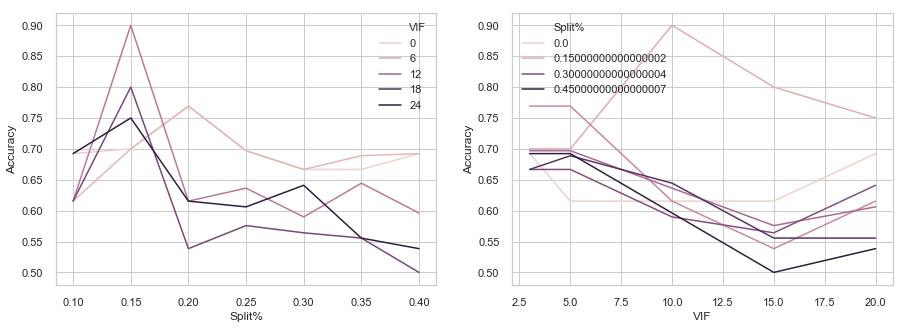

In [325]:
f1, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x="Split%", y="Accuracy", data=df,ax=ax1[0],hue='VIF')
sns.lineplot(x="VIF", y="Accuracy", data=df, ax=ax1[1],hue='Split%')

- From avove to line chart its evident that VIF threshold 10 and test-train split% 15 gives highest accuracy.

In [326]:
x1,y1 = splitdata(calculate_vif_(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],10),'Man of the Match')
accuracy, confmatrix = calculate_accuracy(x1,y1,0.15)
print('Model accuracy is ', accuracy)

Model accuracy is  0.9


<a id='section703'></a>

### Grid Search

In [327]:
vif = print_vif_(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])])
vif = [3,5,10,15,20]
data = []
split = np.arange(0.10,0.40,0.05)
for i in sorted(vif):
    x1,y1 = splitdata(calculate_vif_1(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],i),'Man of the Match')
    for p in (split):
        accuracy, confmatrix = calculate_accuracy(x1,y1,p,True)
        data.append([i,accuracy,p])

df = pd.DataFrame(data, columns = ['VIF', 'Accuracy','Split%'])

C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\avmo

C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\avmo

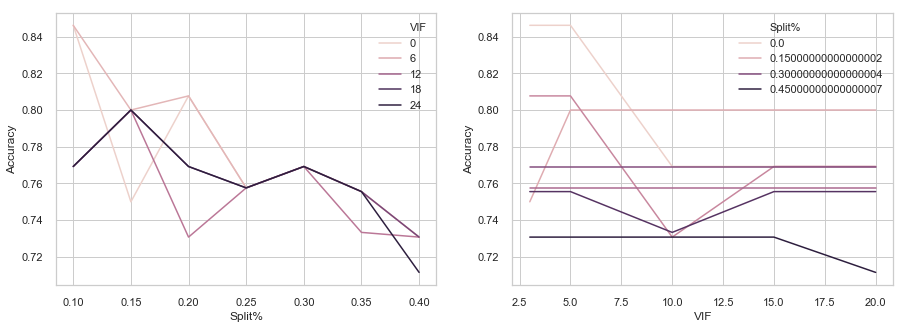

In [328]:
f2, ax2 = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x="Split%", y="Accuracy", data=df,ax=ax2[0],hue='VIF')
sns.lineplot(x="VIF", y="Accuracy", data=df, ax=ax2[1],hue='Split%')

- From avove to line chart its evident that VIF threshold 5 and test-train split% 10 gives highest accuracy.

In [329]:
x1,y1 = splitdata(calculate_vif_1(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],5),'Man of the Match')
accuracy, confmatrix = calculate_accuracy(x1,y1,0.10,True)
print(' Model accuracy is ', accuracy)
print(' Confusion Matrix ', confmatrix)


 Model accuracy is  0.8461538461538461
 Confusion Matrix                Predicted - -VE  Predicted - +VE
Actual - -VE                4                2
Actual - +VE                0                7


C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<a id='section8'></a>

<a id='section8'></a>

### Random Forest

<a id='section801'></a>

<a id='section802'></a>

### Prepare X and Y using pandas & Splitting X and Y into training and testing data set

In [330]:
x1,y1 = splitdata(calculate_vif_1(fifa_data.loc[:,~fifa_data.columns.isin(['Date','Man of the Match','Round','PSO'])],10),'Man of the Match')
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20, random_state=1)

<a id='section803'></a>

### Random Forest in scikit-learn

In [332]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [333]:
model1.fit(x_train,y_train)

C:\Users\avmondka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [334]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(x_test)

In [335]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))

Accuracy score for test data with model 1 is: 0.7307692307692307


In [336]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction1))

Confusion matrix for test data with model 2 is:
 [[10  3]
 [ 4  9]]


- Vary random forest classifier parameters and run model

In [337]:
model2 = RandomForestClassifier(criterion='gini',
                                n_estimators=10,
                                random_state = 1,
                                max_depth=4,
                                min_samples_split=4,
                                min_samples_leaf=2,
                                max_leaf_nodes=5,
                                n_jobs=-1,
                                max_features='log2'
                                )

In [338]:
model2.fit(x_train,y_train)
prediction2 = pd.DataFrame()
prediction2 = model2.predict(x_test)
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Accuracy score for test data with model 2 is: 0.7692307692307693
Confusion matrix for test data with model 2 is:
 [[ 8  5]
 [ 1 12]]


<a id='section804'></a>

### Using model for prediction

<a id='section805'></a>

### Model evaluation using accuracy

In [339]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.7307692307692307
Accuracy score for test data with model 2 is: 0.7692307692307693


__Accuracy score__ of model2 is better than model1.

<a id='section806'></a>

### Model evaluation using confusion matrix

In [340]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Confusion matrix for test data with model 2 is:
 [[10  3]
 [ 4  9]]
Confusion matrix for test data with model 2 is:
 [[ 8  5]
 [ 1 12]]


Comparing confusion matrix for the two models: 
- No. of __False negative__ cases are __more__ in model1

Calculating Recall and precision score for a clearer picture of the scenario.

### Model evaluation using precision score

In [341]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1,pos_label='Yes')
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2,pos_label='Yes')
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model1 is: 0.75
Precision score for test data using model2 is: 0.7058823529411765


<a id='section808'></a>

### Model evaluation using recall score

In [342]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,prediction1,pos_label='Yes'))   
print('Recall score for test data using model2 is:',recall_score(y_test,prediction2,pos_label='Yes'))

Recall score for test data using model1 is: 0.6923076923076923
Recall score for test data using model2 is: 0.9230769230769231


Recall score of model2 is higher, so __model2 is preferable__ from recall point of view.

<a id='section809'></a>

### Model evaluation using F1 score

In [343]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1,pos_label='Yes'))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2,pos_label='Yes'))

F1_score for test data using model1 is: 0.7199999999999999
F1_score for test data using model2 is: 0.8000000000000002


F1_score for model2 is  __better__.

<a id='section810'></a>

### 8.10 Model evaluation using ROC_AUC curve
- For model1

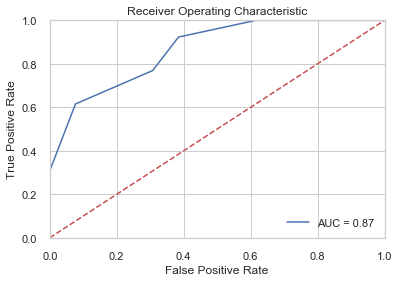

In [251]:
from sklearn import metrics
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label='Yes')
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- For model2

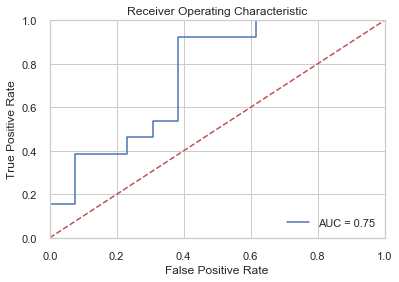

In [252]:
from sklearn import metrics
probs = model2.predict_proba(x_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred,pos_label='Yes')
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Comparing the ROC-AUC curve for both the models, model1 is better as compared to model2. 

<a id='section8'></a>

### Conclusion

- We applied DicisionTreeClassifer and RandomForestClassifer to predict whether team will win man of the match based on independent variables.
- Target data is evenly distrbuted (50-50%), accuracy is good measure.
- DicisionTreeClassifer based model model accuracy was low 65%.
- Applying gird search on DicisionTreeClassifer model accuracy improved to 76%
- Upon filtering independent variable by VIF (colinear independent variable) and varing test-train % model accuracy was improved to 92%
- RandomForestClassifer model accuracy varied bteween 73% - 76%, when model parameter was tuned.
- We learned model accuracy can be improved by varing independent varaible and train-test split.
- Model evaluation is performed to compare model performance. Upon comparing RandomForest model by eveluating accuracy, precision, F1 and ROC-AUD it seems model2 is better as compared to model1.